"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

Tasks to Solve :  
To predict which customer is more likely to purchase the newly introduced travel package  
Which variables are most significant.  
Which segment of customers should be targeted more.

More information:  
https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

In [1]:
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Random_Forest\Dataset\Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [5]:
# Checking for null values 

df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Checking Features for NaN values

In [6]:
# all the features having NaN value 
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
print(features_with_na)

# we also need to seperate the object dtypes as they will not be numerical
obj_features = [f for f in features_with_na if df[f].dtype == 'object']
numerical_features = [f for f in features_with_na if df[f].dtype in ['int64','float64','int32','float32']]

print("Datatype as Object: ", obj_features)
print("Datatype as Numerical",numerical_features)


['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Datatype as Object:  ['TypeofContact']
Datatype as Numerical ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']


In [7]:
# percentage of missing values:
for i,f in enumerate(features_with_na):
    print(i+1,f,np.round(df[f].isnull().mean()*100,5),'% missing values')
    # print()

1 Age 4.62357 % missing values
2 TypeofContact 0.51146 % missing values
3 DurationOfPitch 5.13502 % missing values
4 NumberOfFollowups 0.92062 % missing values
5 PreferredPropertyStar 0.53191 % missing values
6 NumberOfTrips 2.86416 % missing values
7 NumberOfChildrenVisiting 1.35025 % missing values
8 MonthlyIncome 4.76678 % missing values


In [8]:
# replace the categorical nan value with mode()
for i,f in enumerate(obj_features):
    print(f"Feature {i+1}: {f}")
    mode = df[f].mode()[0]
    df[f].fillna(mode,inplace=True)
    
    print(f"Mode for Feature -> {f} :",mode)
    print()
    print(df[f].value_counts())
    print()
    print("Number of Nan values after filling:",df[f].isnull().sum())
    print()


Feature 1: TypeofContact
Mode for Feature -> TypeofContact : Self Enquiry

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

Number of Nan values after filling: 0



In [9]:
# Checking on numerical features having Nan value

df[numerical_features].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values for Numerical Features

In [10]:
# replacing with median [helps in preventing outliers]
df.Age.fillna(df.Age.median(),inplace=True)

# replacing with median 
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

# replacing with mode() as it is a discrete dataset
df.NumberOfFollowups.fillna(df['NumberOfFollowups'].mode()[0],inplace=True)

# property star so most frequent one will we refilled 
df.PreferredPropertyStar.fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)

# number of trips 
df.NumberOfTrips.fillna(df['NumberOfTrips'].mode()[0],inplace=True)

# number of children visiting
df.NumberOfChildrenVisiting.fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)

# Monthly income here mean is similar to median so take anything 
df.MonthlyIncome.fillna(df['MonthlyIncome'].mean(),inplace=True)

In [11]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

As for this problem we have only one dataset, customer_id is not that relevant so we will drop it

In [12]:
df.drop('CustomerID',inplace=True,axis=1)

In [13]:
# Doing some check on categorical variables
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [14]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [15]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

In [16]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

print(df['Gender'].value_counts())
print(df['MaritalStatus'].value_counts())

Gender
Male      2916
Female    1972
Name: count, dtype: int64
MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64


19
Figure(2000x2000)
(5, 4)


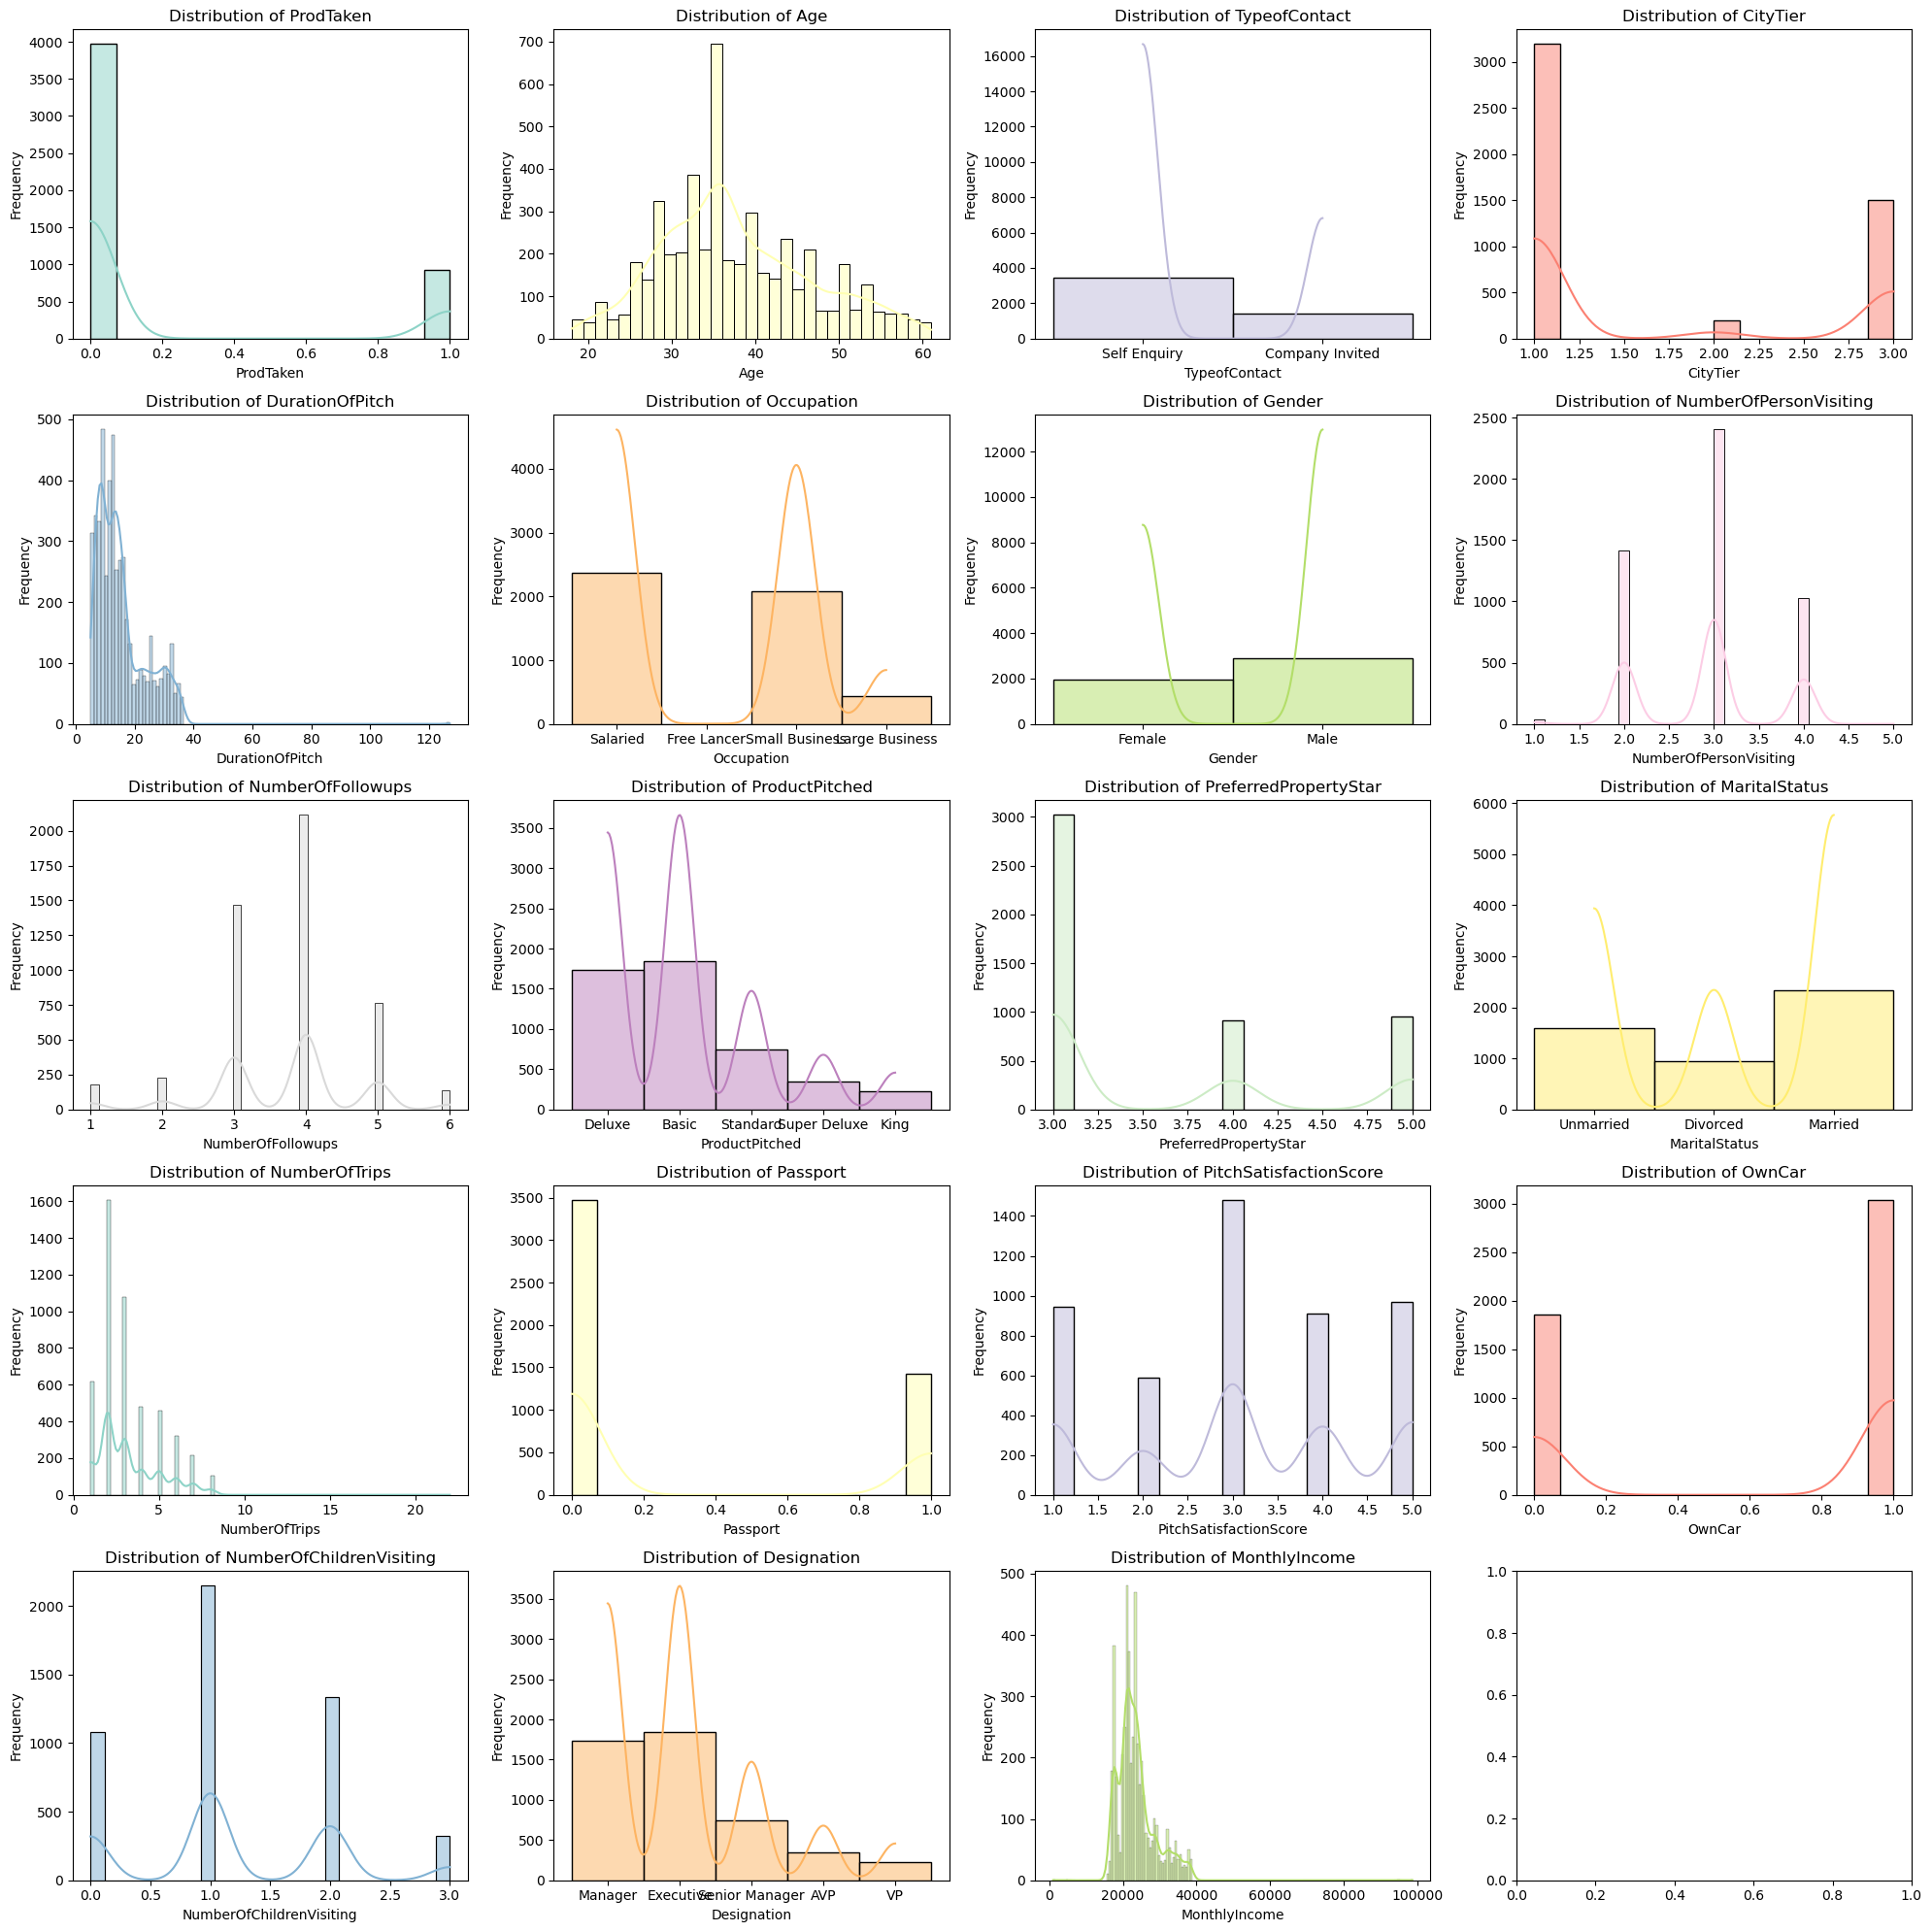

In [17]:
# Finding the distibution of the datapoints

# number of columns to plot:
num_cols = len(df.columns)
print(num_cols)
colors = sns.color_palette("Set3", num_cols)

# # create subplots
fig, axes = plt.subplots(5,4,figsize=(20,20))

print(fig)
print(axes.shape)

# flatten the axes into 1d array
axes = axes.flatten()

for i,feature in enumerate(df.columns):
    # sns.histplot(df[column],kde=True,ax=axes[i])
    sns.histplot(df[feature], kde=True, ax=axes[i],color=colors[i])

    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Figure(2500x2500)
(4, 4)


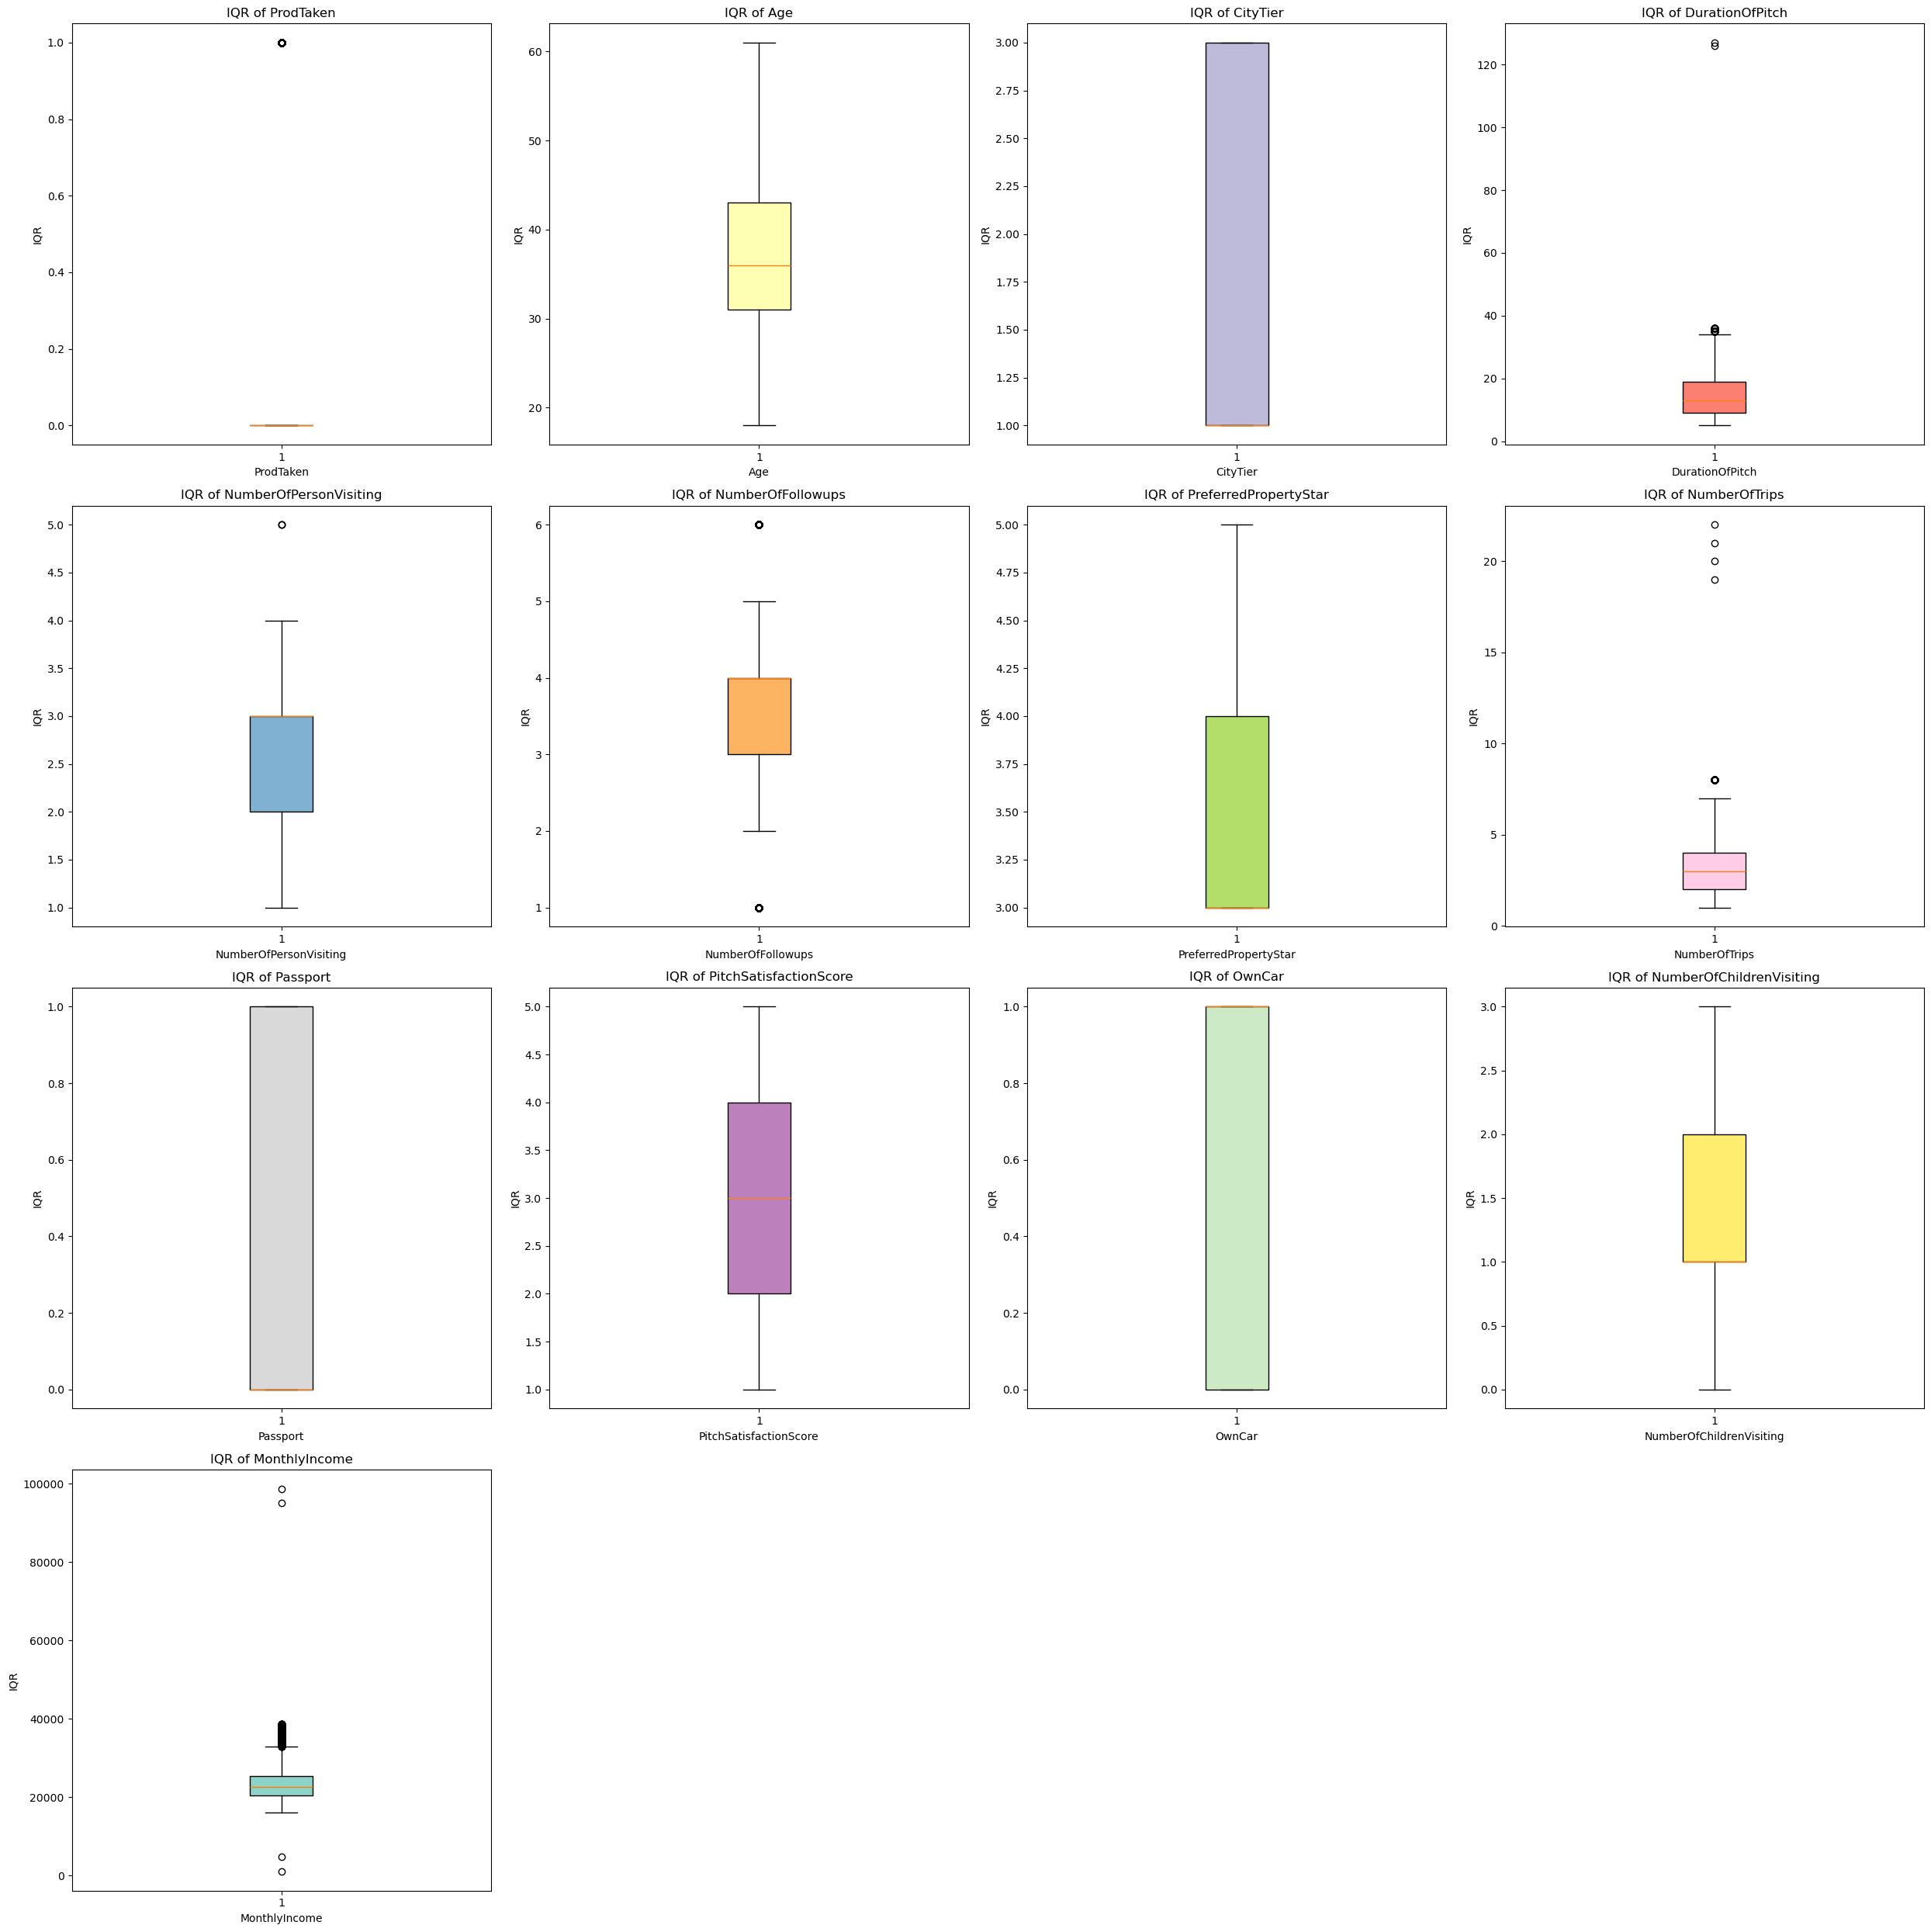

In [18]:
# Outliers using box-plot
numerical_features = [f for f in df.columns if df[f].dtype in ['int64','float64','int32','float32']]

# number of columns to plot:
num_cols = len(numerical_features)
colors = sns.color_palette("Set3", num_cols)

# # create subplots
fig, axes = plt.subplots(4,4,figsize=(25,25))

print(fig)
print(axes.shape)

# flatten the axes into 1d array
axes = axes.flatten()

for i,feature in enumerate(numerical_features):
    axes[i].boxplot(df[feature],patch_artist=True,boxprops=dict(facecolor=colors[i],color='black'))
    axes[i].set_title(f'IQR of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('IQR')

# Hiding unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

plt.tight_layout()
plt.show()


### Feature Engineering 

In [19]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [20]:
df['Visitors'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True)

In [21]:
# getting all numeric features 
numerical_features = [f for f in df.columns if df[f].dtype != 'object']
print(len(numerical_features),numerical_features)

12 ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Visitors']


In [22]:
# getting all categorical features
categorical_features = [f for f in df.columns if df[f].dtype == 'object']
print(len(categorical_features),categorical_features)

6 ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [23]:
# Discrete Features
discrete_feature = [f for f in df.columns if len(df[f].unique()) <= 25]
print(len(discrete_feature),discrete_feature)

15 ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation', 'Visitors']


In [24]:
# continuous features
conti_features = [f for f in df.columns if f not in discrete_feature]
print(len(conti_features),conti_features)

3 ['Age', 'DurationOfPitch', 'MonthlyIncome']


In [25]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Visitors
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [27]:
df.to_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Random_Forest\Dataset\Cleaned_Data_Travel.csv',index=False)